In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from  tensorflow.keras.layers import Dense, Flatten
import os
import numpy as np
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [8]:
# install idx2numpy and import
import idx2numpy

In [10]:
train_images_path = '/Users/naveenkarthik/Desktop/Work/Datasets/MNIST/train-images.idx3-ubyte'
train_labels_path = '/Users/naveenkarthik/Desktop/Work/Datasets/MNIST/train-labels.idx1-ubyte'
test_images_path = '/Users/naveenkarthik/Desktop/Work/Datasets/MNIST/t10k-images.idx3-ubyte'
test_labels_path = '/Users/naveenkarthik/Desktop/Work/Datasets/MNIST/t10k-labels.idx1-ubyte'

In [12]:
X_train=idx2numpy.convert_from_file(train_images_path)
Y_train=idx2numpy.convert_from_file(train_labels_path)
X_test=idx2numpy.convert_from_file(test_images_path)
Y_test=idx2numpy.convert_from_file(test_labels_path)

norm_l=tf.keras.layers.Normalization(axis=-1)
#converting to a 2D input from 3D images 
X_train_flat=X_train.reshape(X_train.shape[0],-1)
X_test_flat=X_test.reshape(X_test.shape[0],-1)
norm_l.adapt(X_train_flat)
X_train_norm=norm_l(X_train_flat).numpy()
X_test_norm=norm_l(X_test_flat).numpy()

X_train_norm=X_train_norm.reshape(-1,28,28,1)
X_test_norm=X_test_norm.reshape(-1,28,28,1)
print(f"X_train_normalized shape : {X_train_norm.shape}")
print(f"X_test_normalized shape: {X_test_norm.shape}")

X_train_normalized shape : (60000, 28, 28, 1)
X_test_normalized shape: (10000, 28, 28, 1)


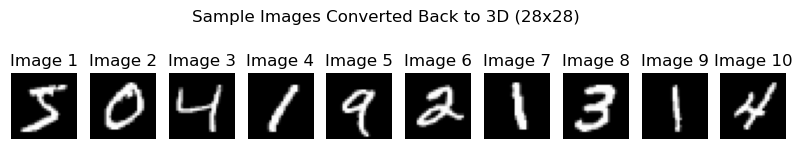

In [36]:
# Display a few sample images to verify 3D reshaping
num_images_to_display = 10
images_3d = X_train_flat[:num_images_to_display].reshape(-1, 28, 28)

plt.figure(figsize=(10, 2))
for i, img in enumerate(images_3d):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.title(f"Image {i+1}")
plt.suptitle("Sample Images Converted Back to 3D (28x28)\n\n")
plt.show()

In [16]:
model=Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=25,activation='relu'),
    Dense(units=15,activation='relu'),
    Dense(units=10,activation='linear')
]) 
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer=Adam(0.001),loss=SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.fit(X_train_norm,Y_train,epochs=50)
logits=model(X_train_norm)
f_x=tf.nn.softmax(logits)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 289us/step - accuracy: 0.8106 - loss: 0.6138
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 327us/step - accuracy: 0.9509 - loss: 0.1679
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 294us/step - accuracy: 0.9609 - loss: 0.1302
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 307us/step - accuracy: 0.9679 - loss: 0.1104
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 363us/step - accuracy: 0.9708 - loss: 0.0950
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 332us/step - accuracy: 0.9741 - loss: 0.0855
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 326us/step - accuracy: 0.9759 - loss: 0.0778
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 290us/step - accuracy: 0.9766 - loss: 0.0723
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 288us/step - accuracy: 0.9794 - loss: 0.0681
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 291us/step - accuracy: 0.9816 - loss: 0.0593
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 292us/step - accuracy: 0.9814 - loss: 0.0589
Epoch 12

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1

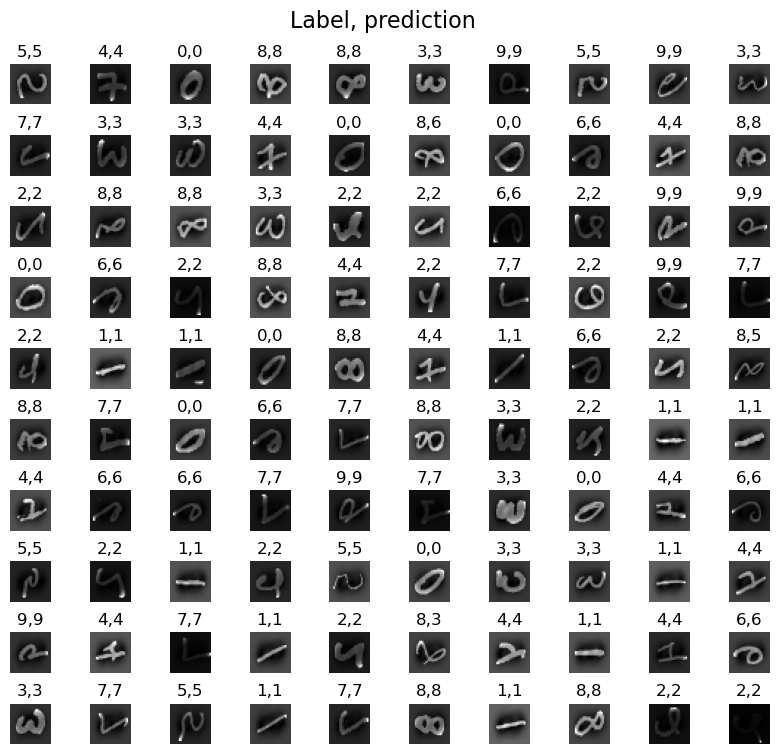

In [42]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X_test_norm.shape[0],784

fig, axes = plt.subplots(10,10, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    X_random_reshaped = X_test_norm[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X_test_norm[random_index].reshape(1,28,28,1)).astype('float32')  
    predicted_class=np.argmax(prediction)
    # Display the label above the image
    ax.set_title(f"{Y_test[random_index]},{predicted_class}")
    ax.set_axis_off()
fig.suptitle("Label, prediction", fontsize=16)
plt.show()

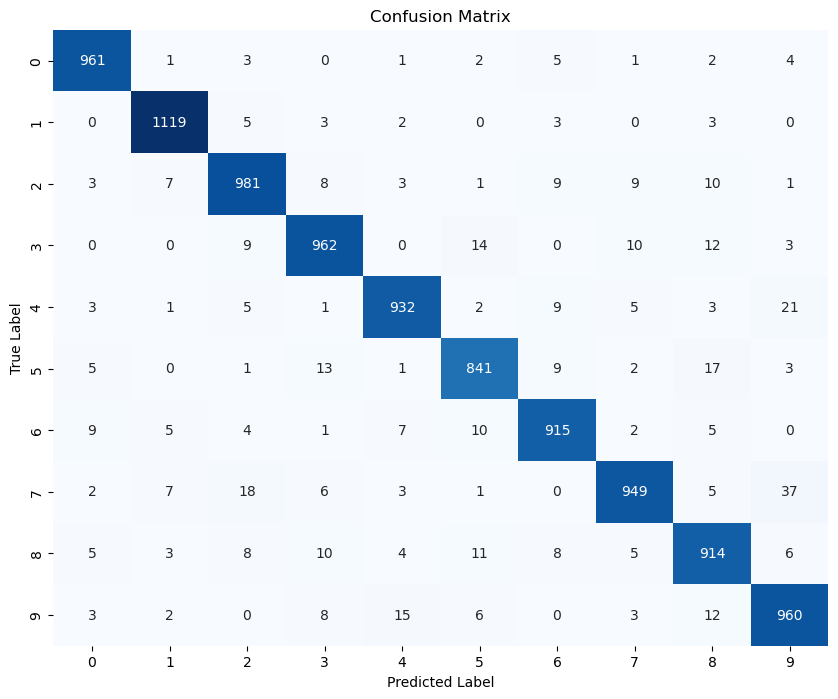

In [26]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns

# Get model predictions on the test set
predictions = model.predict(X_test_norm)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(Y_test, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [30]:
# Detailed classification report
report = classification_report(Y_test, predicted_classes)
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.95      0.95      0.95      1010
           4       0.96      0.95      0.96       982
           5       0.95      0.94      0.94       892
           6       0.96      0.96      0.96       958
           7       0.96      0.92      0.94      1028
           8       0.93      0.94      0.93       974
           9       0.93      0.95      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [28]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, predicted_classes)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9534
